<b> Predicting whether a customer would be signing a loan or not</b>

<b>Importing modules</b>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading the dataset</b>

In [28]:
dataset = pd.read_csv("Project-9.csv")
dataset

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [30]:
dataset.shape

(17908, 21)

<b>Ensuring there's no missing data</b>

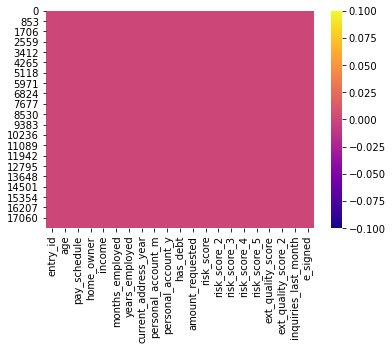

In [31]:
sns.heatmap(dataset.isnull(), cmap='plasma')

<b>Data visualization</b>

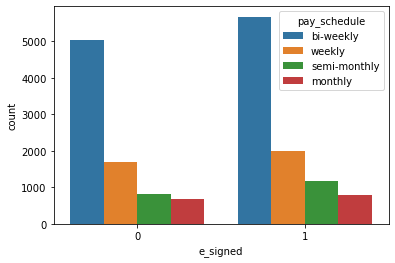

In [32]:
sns.countplot(x='e_signed', hue='pay_schedule', data= dataset)

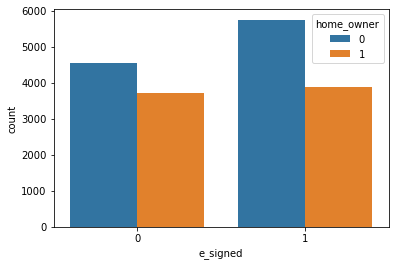

In [33]:
sns.countplot(x='e_signed', hue='home_owner', data= dataset)

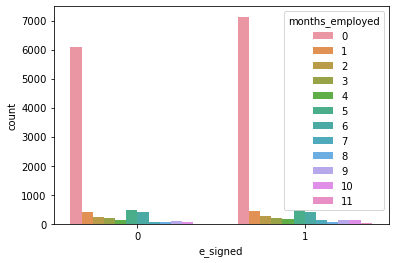

In [34]:
sns.countplot(x='e_signed', hue='months_employed', data= dataset)

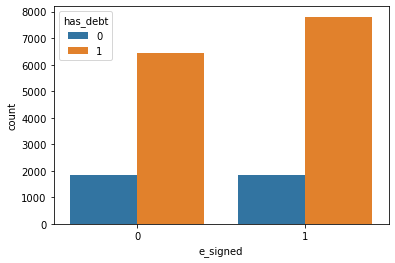

In [35]:
sns.countplot(x='e_signed', hue='has_debt', data= dataset)

<b>Encoding categorical data</b>

In [10]:
pay = pd.get_dummies(dataset['pay_schedule'], drop_first = True)
pay

,monthly,semi-monthly,weekly
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
17903,1,0,0
17904,0,0,0
17905,0,0,1
17906,0,0,0


In [36]:
dataset = pd.concat([dataset,pay], axis=1)
dataset.drop(['pay_schedule'], axis =1 ,inplace = True)
dataset

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,monthly,semi-monthly,weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,0,5,3,2,6,1,...,0.928196,0.664112,0.838012,0.727705,0.627705,2,0,1,0,0
17904,9442442,46,0,6525,0,2,1,3,3,1,...,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0,0
17905,9857590,46,0,2685,0,5,1,1,8,1,...,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,0,1
17906,8708471,42,0,2515,0,3,5,6,1,1,...,0.885684,0.456448,0.686823,0.406568,0.406568,3,1,0,0,0


<b>Extracting features and labels</b>

In [37]:
x = dataset.drop('e_signed', axis= 1)
x

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,monthly,semi-monthly,weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,0,3245,0,5,3,2,6,1,...,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,1,0,0
17904,9442442,46,0,6525,0,2,1,3,3,1,...,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0,0,0
17905,9857590,46,0,2685,0,5,1,1,8,1,...,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0,0,1
17906,8708471,42,0,2515,0,3,5,6,1,1,...,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,0,0,0


In [38]:
y = dataset['e_signed']
y

0        1
1        0
2        0
3        1
4        0
        ..
17903    0
17904    0
17905    0
17906    1
17907    1
Name: e_signed, Length: 17908, dtype: int64

<b>Splitting the dataset into Training set and Test set</b>

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 7)

<b>Feature Scaling</b>

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<b>Logistic Regression</b>

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [44]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

0.5785594639865996


<b>Decision Tree</b>

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [47]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)

[[1479 1247]
 [1255 1989]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      2726
           1       0.61      0.61      0.61      3244

    accuracy                           0.58      5970
   macro avg       0.58      0.58      0.58      5970
weighted avg       0.58      0.58      0.58      5970

0.5809045226130654


<b>Naive Bayes</b>

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [50]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5753768844221105


<b>Random Forest</b>

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, random_state = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1598 1128]
 [1134 2110]]
              precision    recall  f1-score   support

           0       0.58      0.59      0.59      2726
           1       0.65      0.65      0.65      3244

    accuracy                           0.62      5970
   macro avg       0.62      0.62      0.62      5970
weighted avg       0.62      0.62      0.62      5970

0.6211055276381909


In [1]:
hist

hist
